In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Network_anomaly_data.csv')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df.shape

(125973, 43)

In [ ]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes", "dst_bytes","land","wrong_fragment","urgent",
             "hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
             "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
             "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
             "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","last_flag"]

In [ ]:
df.columns = col_names
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
df.attack.value_counts()

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
DoS = ['neptune','smurf','pod','teardrop','back','land']
Probe = ['satan', 'ipsweep', 'nmap', 'portsweep']
R2L = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'warezmaster', 'warezclient', 'spy', 'multihop']
U2R = ['buffer_overflow', 'rootkit', 'loadmodule', 'perl']
Normal = ['normal']

def attack_types(x):
  if x in DoS:
    return 'DoS'
  elif x in Probe:
    return 'Probe'
  elif x in R2L:
    return 'R2L'
  elif x in U2R:
    return 'U2R'
  else:
    return 'Normal'

df['attack_type'] = df['attack'].apply(attack_types)

In [ ]:
web_network_services = [
    'http', 'http_443', 'http_8001', 'https', 'ssl', 'www', 'http_2784',
    'dns', 'finger', 'domain', 'domain_u', 'hostnames', 'netstat', 'ntp_u', 'tim_i', 'urp_i', 'whois', 'name',
    'telnet', 'rlogin', 'X11', 'exec', 'shell', 'ssh', 'login', 'auth', 'imap4', 'sql_net'
]

mail_file_transfer_services = [
    'smtp', 'pop_2', 'pop_3', 'ftp', 'ftp_data', 'tftp_u', 'ecr_i', 'ecr_ftp'
]

def service_category(service):
    if service in web_network_services:
        return 'Web/Network Services'
    elif service in mail_file_transfer_services:
        return 'Mail/File Transfer Services'
    else:
        return 'Other Services'

df['service_type'] = df['service'].apply(service_category)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_type,service_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal,Mail/File Transfer Services
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal,Other Services
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS,Other Services
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal,Web/Network Services
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal,Web/Network Services


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
categorical_columns = ['protocol_type', 'service', 'service_type', 'flag', 'attack_type', 'attack','logged_in','land','wrong_fragment','last_flag']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [ ]:
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_type,service_type
count,125973.00000,125973,125973,125973,1.259730e+05,1.259730e+05,125973.0,125973.0,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973,125973.0,125973,125973
unique,NaN,3,70,11,NaN,NaN,2.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23,22.0,5,3
top,NaN,tcp,http,SF,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,normal,21.0,Normal,Web/Network Services
freq,NaN,102689,40338,74945,NaN,NaN,125948.0,124883.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,67343,62557.0,67343,60544
mean,287.14465,NaN,NaN,NaN,4.556674e+04,1.977911e+04,NaN,NaN,0.000111,0.204409,...,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,NaN,NaN,NaN,NaN
std,2604.51531,NaN,NaN,NaN,5.870331e+06,4.021269e+06,NaN,NaN,0.014366,2.149968,...,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,0.00000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,0.00000,NaN,NaN,NaN,2.760000e+02,5.160000e+02,NaN,NaN,0.000000,0.000000,...,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


Missing value treatment

In [ ]:
np.any(df.isna())

False

In [ ]:
np.any(df.duplicated())

False

### EDA

#### Univariate analysis

In [ ]:
df2 = df.copy()

In [ ]:
df2['detect'] = df['attack_type'].apply(lambda x: 1 if x != 'Normal' else 0)

In [ ]:
df2.detect.value_counts()

,count
detect,
0,67343
1,58630


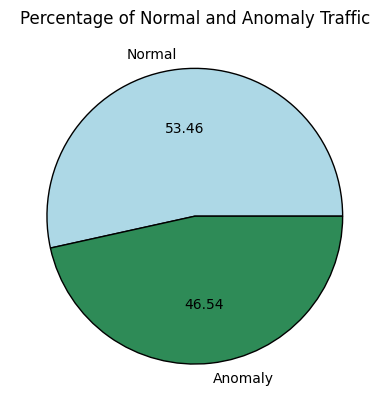

In [ ]:
plt.pie(df2['detect'].value_counts(), labels=['Normal','Anomaly'],autopct="%0.2f", colors = ['lightblue', 'seagreen'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Percentage of Normal and Anomaly Traffic')
plt.show()

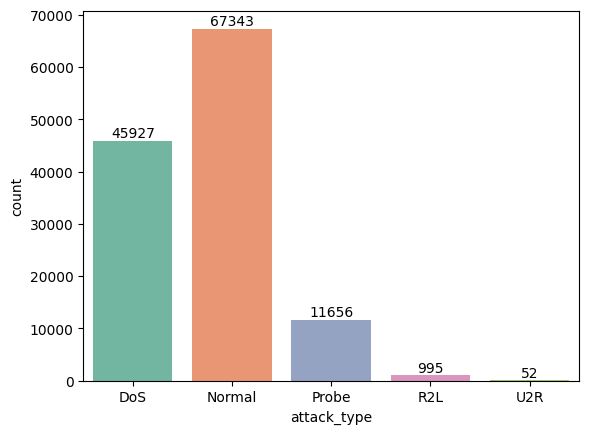

In [ ]:
ax = sns.countplot(x=df['attack_type'], palette = 'Set2')
for c in ax.containers:
  ax.bar_label(c)
plt.show()

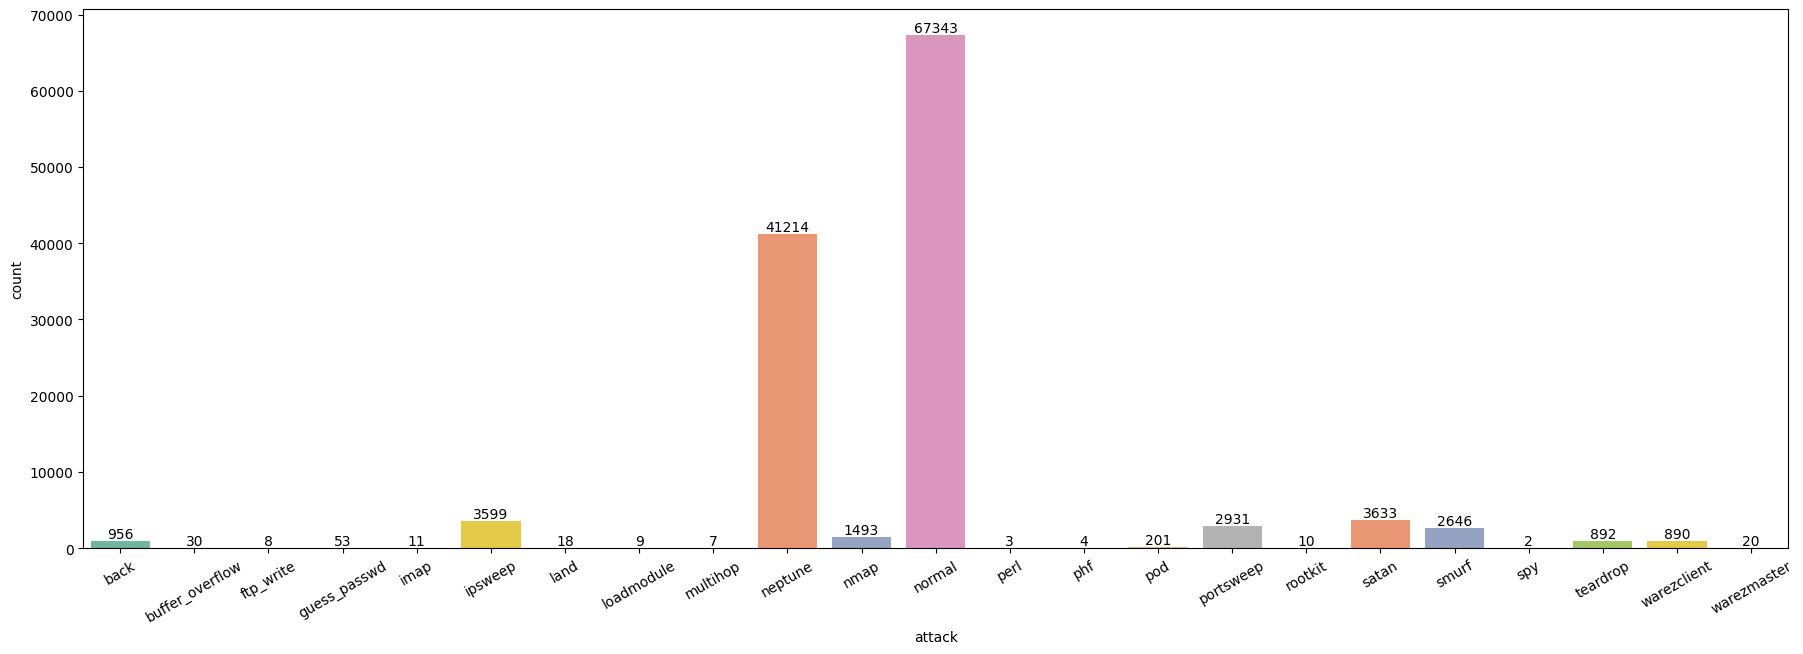

In [ ]:
figure = plt.figure(figsize=(22,7))
ax=sns.countplot(x=df['attack'], palette = 'Set2')
for c in ax.containers:
  ax.bar_label(c)
plt.xticks(rotation=30)
plt.show()

In [ ]:
df2['protocol_type'].value_counts()

,count
protocol_type,
tcp,102689
udp,14993
icmp,8291


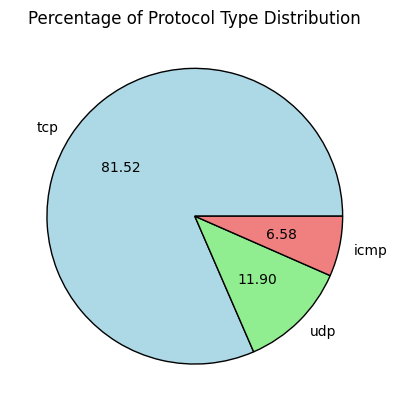

In [ ]:
plt.pie(df2['protocol_type'].value_counts(), labels=['tcp','udp','icmp'],autopct="%0.2f", colors = ['lightblue', 'lightgreen','lightcoral'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Percentage of Protocol Type Distribution')
plt.show()

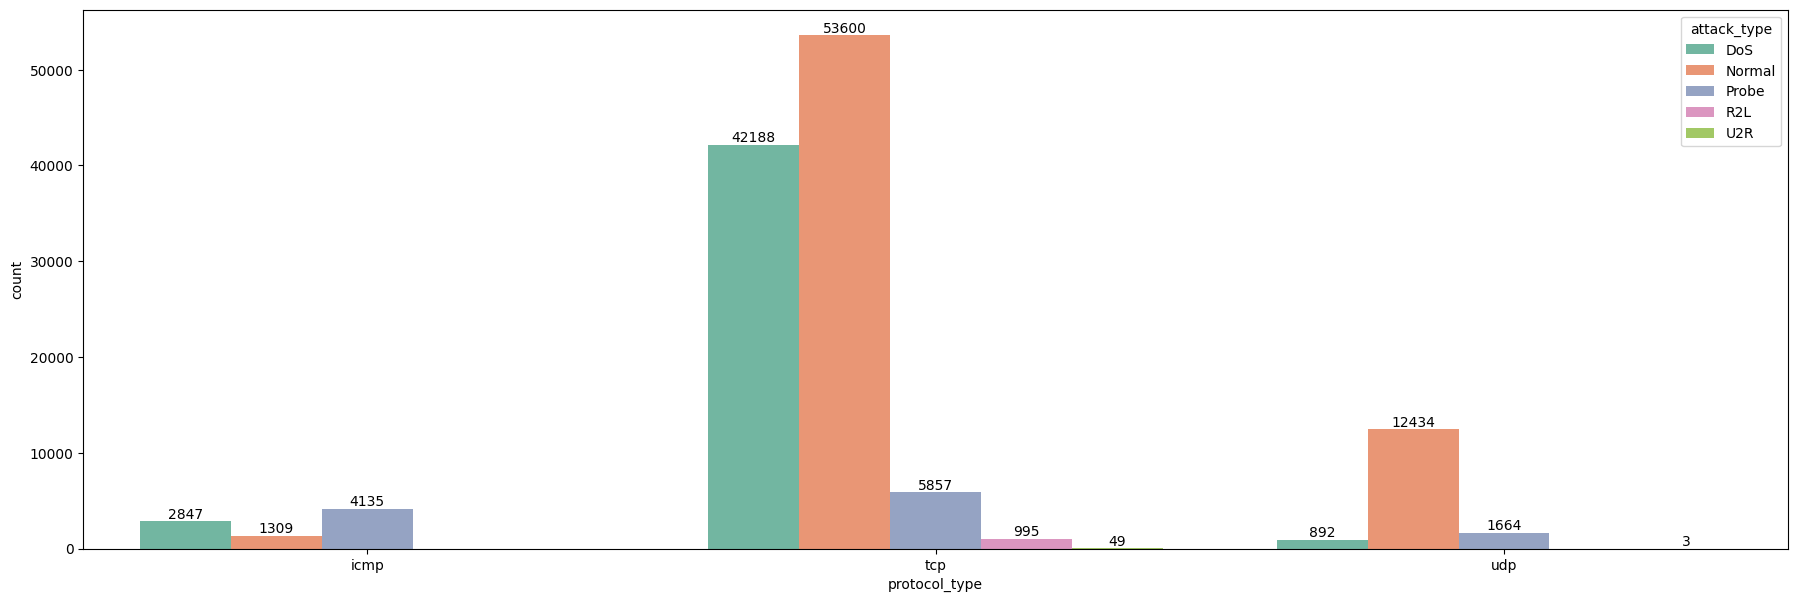

In [ ]:
figure = plt.figure(figsize=(22,7))
ax=sns.countplot(x=df['protocol_type'], palette = 'Set2', hue=df['attack_type'])
for c in ax.containers:
  ax.bar_label(c)
plt.show()

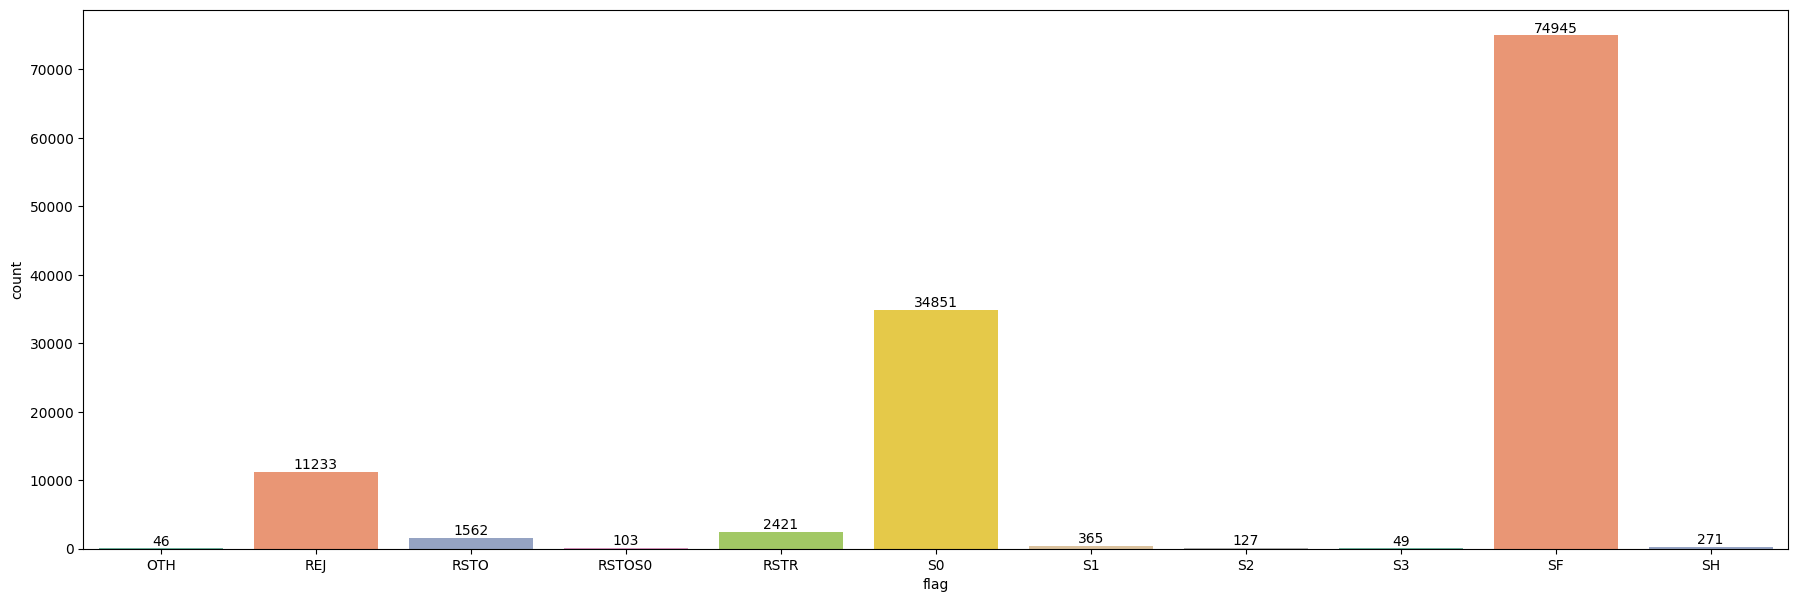

In [ ]:
figure = plt.figure(figsize=(22,7))
ax=sns.countplot(x=df['flag'], palette = 'Set2')
for c in ax.containers:
  ax.bar_label(c)
plt.show()

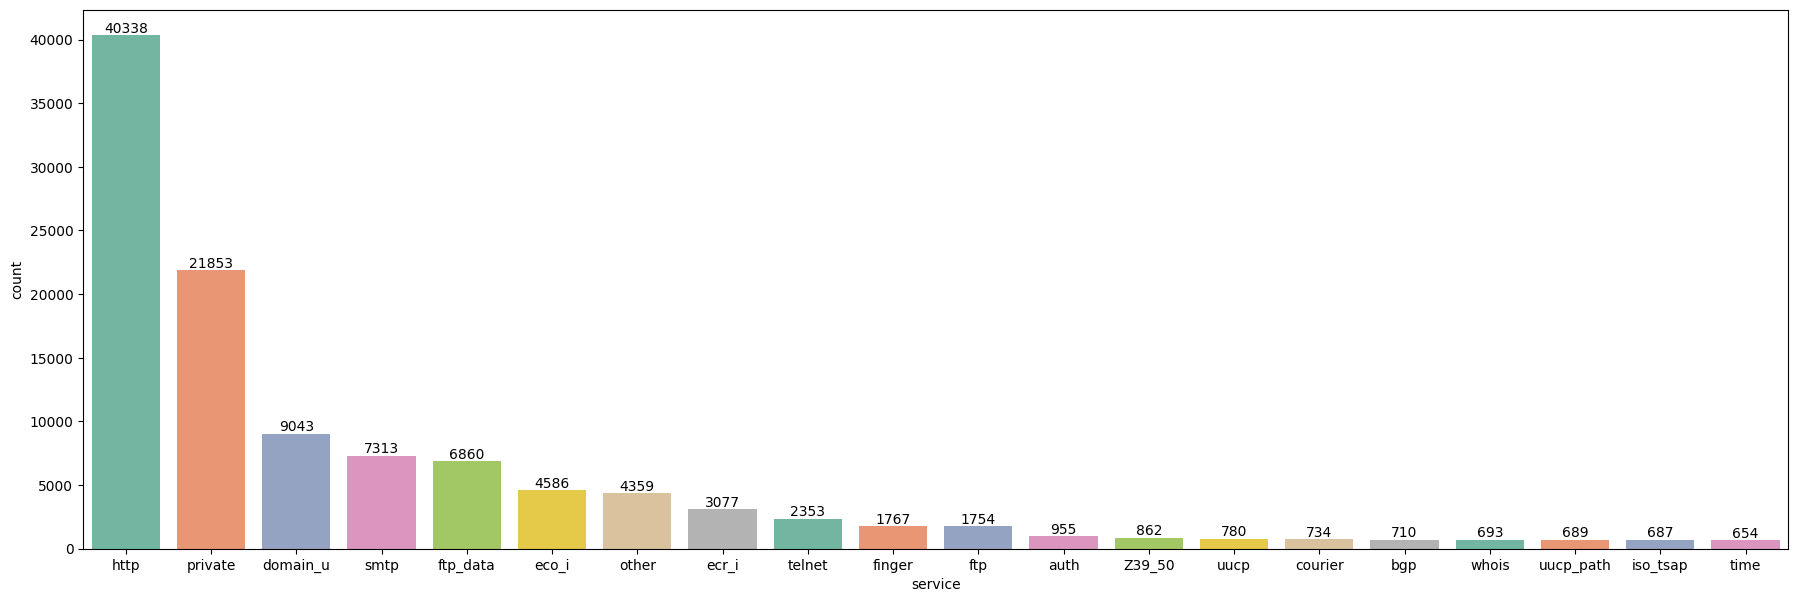

In [ ]:
top20_services = pd.DataFrame(df['service'].value_counts().head(20))
figure = plt.figure(figsize=(22,7))
ax=sns.barplot(x=top20_services.index.astype(str), y=top20_services['count'], palette = 'Set2')
for c in ax.containers:
  ax.bar_label(c)
plt.show()

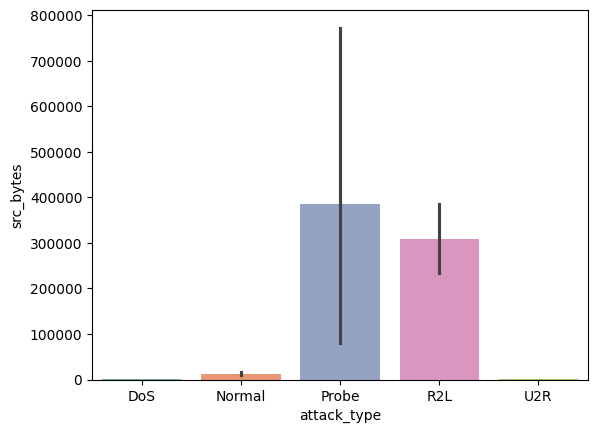

In [ ]:
ax=sns.barplot(x=df['attack_type'], y=df['src_bytes'],palette='Set2')
plt.show()

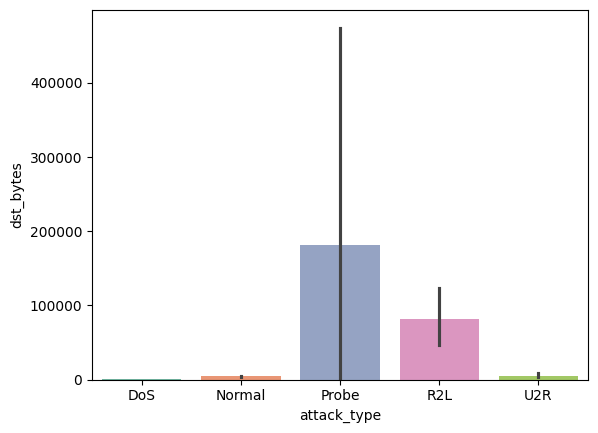

In [ ]:
sns.barplot(x=df['attack_type'], y=df['dst_bytes'],palette='Set2')
plt.show()

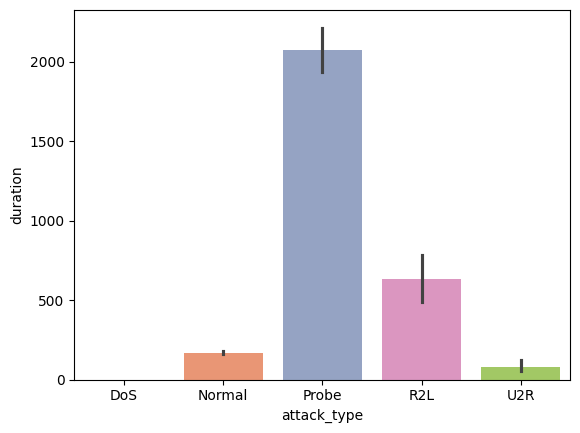

In [ ]:
sns.barplot(x=df['attack_type'], y=df['duration'],palette='Set2')
plt.show()

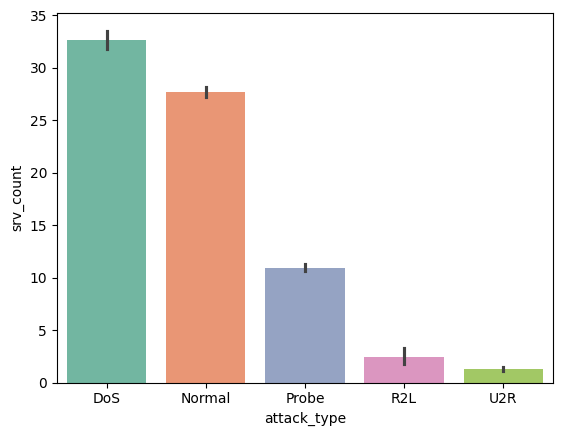

In [ ]:
sns.barplot(x=df['attack_type'], y=df['srv_count'],palette='Set2')
plt.show()

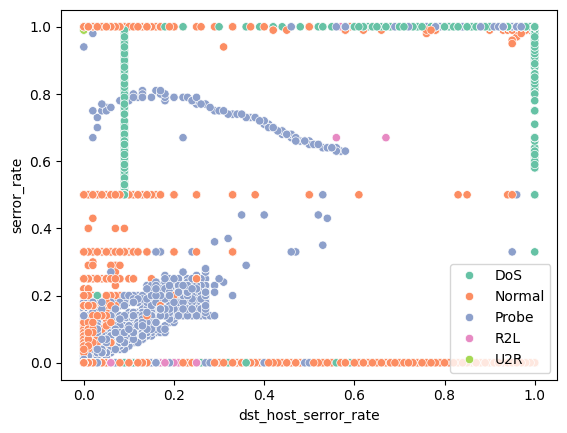

In [ ]:
sns.scatterplot(x=df['dst_host_serror_rate'], y=df['serror_rate'],hue=df['attack_type'], palette='Set2')
plt.legend(loc='lower right')
plt.show()

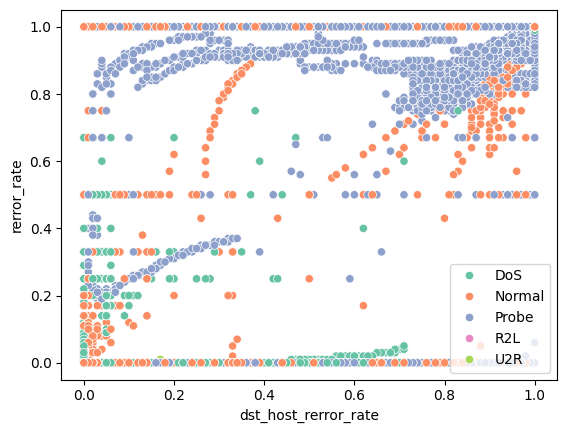

In [ ]:
sns.scatterplot(x=df['dst_host_rerror_rate'], y=df['rerror_rate'],hue=df['attack_type'], palette='Set2')
plt.legend(loc='lower right')
plt.show()

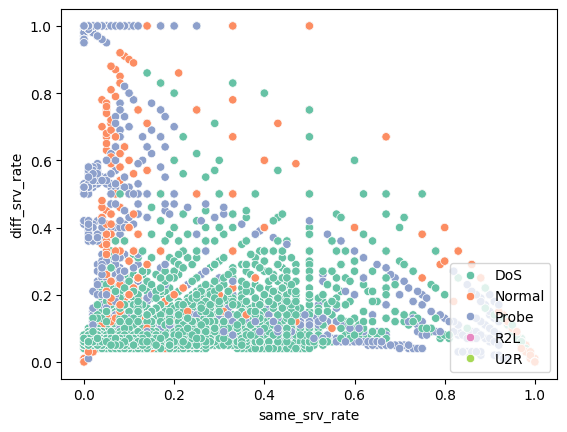

In [ ]:
# figure=plt.figure(figsize=(10,8))
sns.scatterplot(x=df['same_srv_rate'], y=df['diff_srv_rate'],hue=df['attack_type'], palette='Set2')
plt.legend(loc='lower right')
plt.show()

In [ ]:
categorical_columns

['protocol_type',
 'service',
 'service_type',
 'flag',
 'attack_type',
 'attack',
 'logged_in',
 'land',
 'wrong_fragment',
 'last_flag']

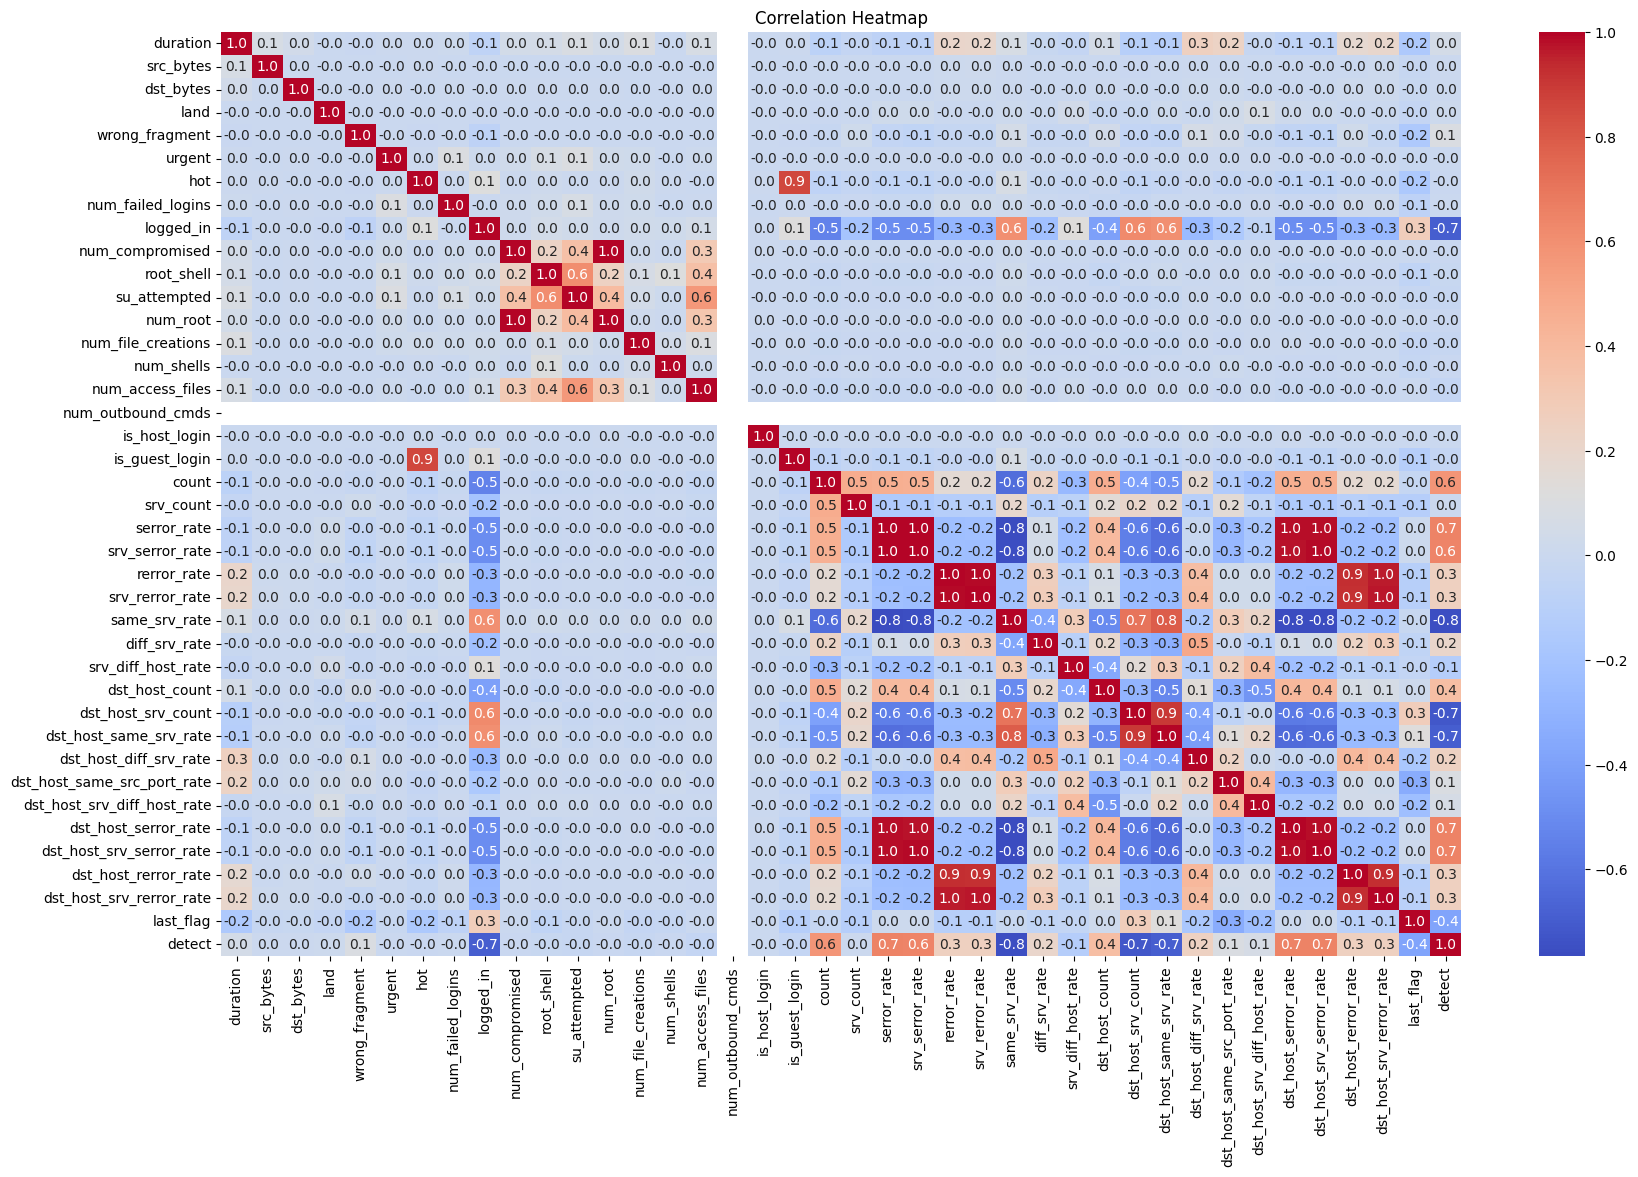

In [ ]:
corr_matrix = df2.drop(['protocol_type','service', 'service_type','flag','attack_type','attack'], axis=1).corr()

# Create heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# df3 = df2.copy()
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# X = df3.drop(['attack_type','attack','detect'], axis=1)
# y = df3['detect']
# feature_names = X.columns
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# model = RandomForestClassifier(n_estimators=100, random_state=10)
# model.fit(X_train, y_train)

# importances = model.feature_importances_
# feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
# print(feature_imp_df)


### Hypothesis Testing

1. Network Traffic Volume and Anomalies:
**Null Hypothesis** : Network traffic volume in no ways suggest anomalous or normal connections.

**Alternate Hypothesis** : Network connections with unusually high or low traffic volume (bytes transferred) are more likely to be anomalous.


In [ ]:
#transforming the 'src_bytes' and 'dst_bytes' into their log forms because the values are too small to be detected correctly by histogram or qq-plots.
df2['log_dst_bytes'] = np.log1p(df2['dst_bytes'])
df2['log_src_bytes'] = np.log1p(df2['src_bytes'])
normal_df = df2.loc[df2['detect'] == 0]
anomaly_df = df2.loc[df2['detect'] == 1]

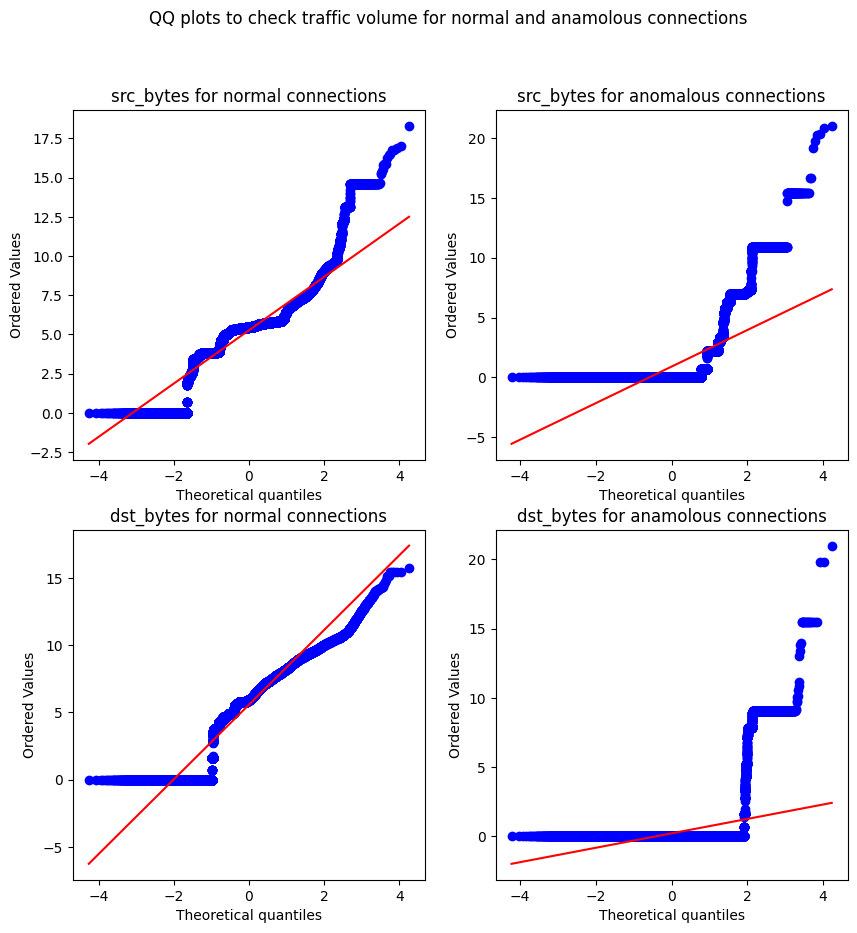

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
spy.probplot(x=normal_df['log_src_bytes'], dist='norm', plot=plt)
plt.title('src_bytes for normal connections')

plt.subplot(2,2,2)
spy.probplot(x=anomaly_df['log_src_bytes'], dist='norm', plot=plt)
plt.title('src_bytes for anomalous connections')

plt.subplot(2,2,3)
spy.probplot(x=normal_df['log_dst_bytes'], dist='norm', plot=plt)
plt.title('dst_bytes for normal connections')

plt.subplot(2,2,4)
spy.probplot(x=anomaly_df['log_dst_bytes'], dist='norm', plot=plt)
plt.title('dst_bytes for anamolous connections')

plt.suptitle('QQ plots to check traffic volume for normal and anamolous connections')
plt.show()

In [ ]:
# Performing t-test
tstat1, p1 = spy.ttest_ind(normal_df['log_src_bytes'], anomaly_df['log_src_bytes'])
tstat2, p2 = spy.ttest_ind(normal_df['log_dst_bytes'], anomaly_df['log_dst_bytes'])
p_val = 0.05
print(f'p-value for src_bytes: {p1}')
print(f'p-value for dst_bytes: {p2}')
if p1 < p_val and p2 < p_val:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')


p-value for src_bytes: 0.0
p-value for dst_bytes: 0.0
Reject null hypothesis


Hence, we can incur from the tests that netowk traffic with unusually high or low traffic volume suggest anamolous connections.

2. Impact of Protocol Type on Anomaly Detection

**Null Hypothesis** :

**Alternate Hypothesis** : Certain protocols are more frequently associated with network anomalies.



In [ ]:
contingency_table=pd.crosstab(df2['protocol_type'], df2['detect'])
contingency_table


detect,0,1
protocol_type,,
icmp,1309,6982
tcp,53600,49089
udp,12434,2559


In [ ]:
chi2_stat, p_value, dof, expected = spy.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2_stat}')
print(f'p-value: {p_val}')
p_val=0.05
if p_value < p_val:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

Chi-square statistic: 10029.24862778463
p-value: 0.05
Reject null hypothesis


Protocol type  

4. Connection Status and Anomalies:

Hypothesis: Error flags in the Flag feature are significantly associated with anomalies.

Tests: Use logistic regression to assess the impact of connection status on the likelihood of an anomaly.



In [ ]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df2['flag']
y = df2['detect']

# One-hot encode the 'flag' feature
X_encoded = pd.get_dummies(X, columns=['flag'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Check coefficients to see the impact of each flag on the likelihood of an anomaly
coefficients = pd.DataFrame(model.coef_, columns=X_encoded.columns)
print("Logistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
        REJ      RSTO    RSTOS0     RSTR        S0       S1        S2  \
0  0.227685  0.890804  2.450618  1.82411  3.602478 -4.29897 -3.244068   

         S3        SF        SH  
0 -2.739586 -2.638399  2.837165  


In [ ]:
pd.crosstab(df2['flag'], df2['detect'])

detect,0,1
flag,,
OTH,11,35
REJ,2693,8540
RSTO,219,1343
RSTOS0,0,103
RSTR,146,2275
S0,354,34497
S1,361,4
S2,119,8
S3,45,4


Positive coefficients indicate that the presence of the flag increases the likelihood of the connection being anomalous whereas negative coefficients decreases the likelihood of the connection being anomalous. The coefficients of each feature represent the log-odds of the outcome for each feature.

As we can observe, error flags like REJ, RSTO RSTOS0, RSTR, S0 AND SH have significant positive coefficients, indicating their strong associatation with anamolous connections. This claim can further be attested by taking a look at the values in the crosstable that displays that connections with error flags are mostly anamolous connections.

Hence, the hypothesis is rejected.

4. **Duration for Anamoly Detection**
**Null Hypothesis** : Duration of a connection can't determine whether the connection in normal or anamolous.

**Alternate Hypothesis** : Extremely high or low durations of connections are often anamolous connections.

In [ ]:
normal_df['duration'].describe()

,duration
count,67343.000000
mean,168.587396
std,1304.452127
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,40504.000000


In [ ]:
anomaly_df['duration'].describe()

,duration
count,58630.000000
mean,423.320689
std,3547.684533
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,42908.000000


In [ ]:
df2['log_duration']=np.log1p(df2['duration'])
normal_df = df2.loc[df2['detect'] == 0]
anomaly_df = df2.loc[df2['detect'] == 1]

In [ ]:
anomaly_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_type,service_type,detect,log_dst_bytes,log_src_bytes,log_duration
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.0,neptune,19,DoS,Other Services,1,0.0,0.0,0.0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,1.0,neptune,21,DoS,Other Services,1,0.0,0.0,0.0
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.0,neptune,21,DoS,Other Services,1,0.0,0.0,0.0
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.0,neptune,21,DoS,Other Services,1,0.0,0.0,0.0
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.0,0.0,neptune,21,DoS,Other Services,1,0.0,0.0,0.0


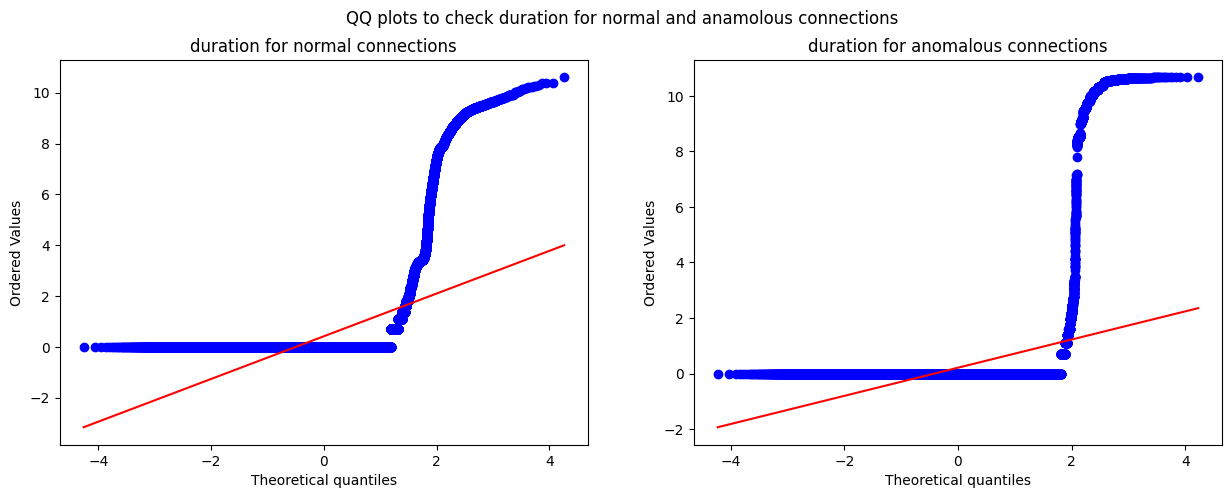

In [ ]:
figure = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
spy.probplot(x=normal_df['log_duration'], dist='norm', plot=plt)
plt.title('duration for normal connections')

plt.subplot(1,2,2)
spy.probplot(x=anomaly_df['log_duration'], dist='norm', plot=plt)
plt.title('duration for anomalous connections')

plt.suptitle('QQ plots to check duration for normal and anamolous connections')
plt.show()

In [ ]:
t_stat, p = spy.mannwhitneyu(normal_df['log_duration'], anomaly_df['log_duration'], alternative='two-sided')
print(f't-statistic: {t_stat}')
print(f'p-value: {p}')
p_val = 0.05
if p < p_val:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

t-statistic: 2135295646.0
p-value: 0.0
Reject null hypothesis


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag', 'attack_type',
       'service_type'],
      dtype='object')

In [ ]:
df.service.nunique()

70

In [ ]:
with open('nad_dataset.pkl', 'wb') as f:
  pickle.dump(df, f)